In [48]:
#open pickle file to dataframe
import pandas as pd
import pickle
with open('../datafiles/filtered_data.pkl', 'rb') as f:
    df = pickle.load(f)

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

C:\Users\case4\AppData\Local\Temp\ipykernel_30364\1494833445.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pickle.load(f)


In [49]:
import pandas as pd

# Convert EPDs and accuracies to numeric
epd_columns_with_acc = ['BW', 'BW Acc', 'WW', 'WW Acc', 'YW', 'YW Acc', 'MK', 'MK Acc', 'TM', 'Growth']
for col in epd_columns_with_acc:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert date columns to datetime
date_columns = ['Date of Birth', 'Weaning Date', 'Yearling Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop columns with more than 50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]

In [51]:
df.columns

Index(['Status/Disposal', 'Brand', 'Brand Location', 'Tattoo', 'Name',
       'Registration Number', 'Breeder', 'Breeder Member Number', 'Owner',
       'Owner Member Number', 'Date of Birth', 'Birth Method', 'Sire', 'Dam',
       'Status', 'Type or Sex', 'Breed 1', 'Breed Comp 1', 'Horns', 'EPDType',
       'EPD Reporting Period', 'CED', 'CED Acc', 'BW', 'BW Acc', 'WW',
       'WW Acc', 'YW', 'YW Acc', 'MK', 'MK Acc', 'TM', 'Birth Weight',
       'Adjusted Birth Weight', 'Birth Contemp Group', 'Birth contemporaries',
       'Birth Weight Ratio', 'Calving Ease', 'Twin code', 'Weaning Date',
       'Weaning Weight Date', 'Weaning Weight', 'Weaning Contemp Group',
       'Weaning Contemporaries', 'Weaning WDA', 'Weaning Mgmt Code', 'Growth',
       'Year_Born', 'Age', 'Designation', 'Composite Score'],
      dtype='object')

In [46]:
# Assume df is your DataFrame
epd_columns = ['BW', 'WW', 'YW', 'MK', 'TM', 'Growth']

# Drop rows with missing EPD values
df_epd = df.dropna(subset=epd_columns)

# Alternatively, impute missing values
for col in epd_columns:
    df_epd[col].fillna(df_epd[col].mean(), inplace=True)

C:\Users\case4\AppData\Local\Temp\ipykernel_30364\2343743980.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_epd[col].fillna(df_epd[col].mean(), inplace=True)
C:\Users\case4\AppData\Local\Temp\ipykernel_30364\2343743980.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epd[col].fillna(df_epd[col].mean(), inplace=True)


In [47]:
df.columns()

TypeError: 'Index' object is not callable

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [26]:
# Drop rows with missing EPDs
sires_df = df.dropna(subset=epd_columns)
dams_df = df.dropna(subset=epd_columns)
for col in epd_columns:
    sires_df[col] = pd.to_numeric(sires_df[col], errors='coerce')
    dams_df[col] = pd.to_numeric(dams_df[col], errors='coerce')

C:\Users\case4\AppData\Local\Temp\ipykernel_30364\772050310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sires_df[col] = pd.to_numeric(sires_df[col], errors='coerce')
C:\Users\case4\AppData\Local\Temp\ipykernel_30364\772050310.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dams_df[col] = pd.to_numeric(dams_df[col], errors='coerce')


In [28]:
df.head()

,Status/Disposal,Brand,Brand Location,Tattoo,Name,Registration Number,Breeder,Breeder Member Number,Owner,Owner Member Number,Date of Birth,Birth Method,Sire,Dam,Status,Type or Sex,Breed 1,Breed Comp 1,Horns,EPDType,EPD Reporting Period,CED,CED Acc,BW,BW Acc,WW,WW Acc,YW,YW Acc,MK,MK Acc,TM,Birth Weight,Adjusted Birth Weight,Birth Contemp Group,Birth contemporaries,Birth Weight Ratio,Calving Ease,Twin code,Weaning Date,Weaning Weight Date,Weaning Weight,Weaning Contemp Group,Weaning Contemporaries,Weaning WDA,Weaning Mgmt Code,Growth,Year_Born,Age,Designation,Composite Score
1577,0,C0330,LH,7A01,CROSSWINDS 7A01,AF106006,MATADOR CATTLE COMPANY,16.0,ARTESIAN CATTLE & FARMING LLC,291.0,2017-03-17,NS,AF33641,AF11057,Active,C,AA,100.0,H,P,20240808.0,6.3,0.16,1.8,0.19,38.0,0.14,72.0,0.02,21.0,0.09,39.704002,0.0,NaN,5587-4491,6.0,NaN,1.0,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,73.1812,2017.0,7.0,Dam,3.716940
1578,0,C0330,LH,7A07,CROSSWINDS 7A07,AF106012,MATADOR CATTLE COMPANY,16.0,ARTESIAN CATTLE & FARMING LLC,291.0,2017-04-14,NS,AF11041,AF21694,Active,C,AA,100.0,H,P,20240808.0,-0.6,0.18,2.6,0.27,44.0,0.20,81.0,0.04,30.0,0.15,51.379500,0.0,NaN,5587-4491,6.0,NaN,1.0,1.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,83.0564,2017.0,7.0,Dam,3.852308
1584,0,NaN,LH,736Y,MCC 736Y,AF11048,MATADOR CATTLE COMPANY,16.0,ARTESIAN CATTLE & FARMING LLC,291.0,2011-02-24,ET,AF4596,AF509,Active,C,AA,100.0,H,P,20240808.0,-0.1,0.22,2.9,0.35,31.0,0.28,62.0,0.05,17.0,0.16,32.051500,0.0,NaN,427-657,16.0,NaN,NaN,1.0,2011-08-31,8/31/2011,434.0,458-1066,19.0,2.31,2.0,61.5971,2011.0,13.0,Dam,2.734143
1586,0,NaN,LH,728Y,MCC 728Y,AF11079,"HEARTBRAND BEEF, INC.",1.0,ARTESIAN CATTLE & FARMING LLC,291.0,2011-03-20,ET,AF110,AF146,Active,C,AA,100.0,H,P,20240808.0,0.7,0.28,2.0,0.36,35.0,0.34,68.0,0.06,20.0,0.28,37.127500,0.0,NaN,428-659,7.0,NaN,NaN,1.0,2011-10-04,10/4/2011,510.0,486-1337,5.0,2.58,1.0,68.6120,2011.0,13.0,Dam,3.158638
1587,0,F0001,LH,9254E,HEARTBRAND 9254E ET,AF112600,"HEARTBRAND BEEF, INC.",1.0,ARTESIAN CATTLE & FARMING LLC,291.0,2016-10-16,ET,AF6971,AF6941,Active,B,AA,100.0,H,P,20240808.0,-4.0,0.36,3.0,0.46,34.0,0.32,69.0,0.06,24.0,0.18,41.391000,60.0,NaN,5704-4984,3.0,NaN,1.0,1.0,2017-06-14,6/14/2017,510.0,1127-140,3.0,2.12,1.0,69.3700,2016.0,8.0,Bull,3.156449


In [56]:
df[df['Designation'] == 'Bull']

,Status/Disposal,Brand,Brand Location,Tattoo,Name,Registration Number,Breeder,Breeder Member Number,Owner,Owner Member Number,Date of Birth,Birth Method,Sire,Dam,Status,Type or Sex,Breed 1,Breed Comp 1,Horns,EPDType,EPD Reporting Period,CED,CED Acc,BW,BW Acc,WW,WW Acc,YW,YW Acc,MK,MK Acc,TM,Birth Weight,Adjusted Birth Weight,Birth Contemp Group,Birth contemporaries,Birth Weight Ratio,Calving Ease,Twin code,Weaning Date,Weaning Weight Date,Weaning Weight,Weaning Contemp Group,Weaning Contemporaries,Weaning WDA,Weaning Mgmt Code,Growth,Year_Born,Age,Designation,Composite Score
1587,0,F0001,LH,9254E,HEARTBRAND 9254E ET,AF112600,"HEARTBRAND BEEF, INC.",1.0,ARTESIAN CATTLE & FARMING LLC,291.0,2016-10-16,ET,AF6971,AF6941,Active,B,AA,100.0,H,P,20240808.0,-4.0,0.36,3.0,0.46,34.0,0.32,69.0,0.06,24.0,0.18,41.391000,60.0,NaN,5704-4984,3.0,NaN,1.0,1.0,2017-06-14,6/14/2017,510.0,1127-140,3.0,2.12,1.0,69.3700,2016.0,8.0,Bull,3.156449
1626,0,C0330,RH,0A04,0A04,AF178217,DARYL WEST,351.0,ARTESIAN CATTLE & FARMING LLC,291.0,2020-03-25,NS,AF67964,AF21701,Active,B,AA,100.0,H,P,20240808.0,3.0,0.24,1.6,0.30,34.0,0.13,68.0,0.03,27.0,0.08,43.934000,80.0,80.0,16221-3,6.0,101.0,1.0,1.0,2020-11-03,11/3/2020,610.0,16415-56,5.0,2.74,1.0,68.6934,2020.0,4.0,Bull,3.761577
1628,0,C0330,RH,0A06,0A06,AF178219,DARYL WEST,351.0,ARTESIAN CATTLE & FARMING LLC,291.0,2020-03-29,NS,AF67964,AF91302,Active,B,AA,100.0,H,P,20240808.0,1.5,0.17,2.0,0.29,45.0,0.11,82.0,0.02,27.0,0.07,50.119500,75.0,78.0,16221-3,6.0,98.0,1.0,1.0,2020-11-03,11/3/2020,555.0,16415-56,5.0,2.53,1.0,84.3740,2020.0,4.0,Bull,4.150630
1629,0,C0330,RH,0A08,0A08,AF178221,DARYL WEST,351.0,ARTESIAN CATTLE & FARMING LLC,291.0,2020-04-02,NS,AF67964,AF21694,Active,B,AA,100.0,H,P,20240808.0,1.8,0.20,2.0,0.30,37.0,0.13,72.0,0.03,26.0,0.08,45.188004,85.0,85.0,16221-3,6.0,107.0,1.0,1.0,2020-11-03,11/3/2020,590.0,16415-56,5.0,2.74,1.0,73.0820,2020.0,4.0,Bull,3.771545
1630,0,C0330,RH,0A09,0A09,AF178222,DARYL WEST,351.0,ARTESIAN CATTLE & FARMING LLC,291.0,2020-04-06,NS,AF67964,AF91289,Active,B,AA,100.0,H,P,20240808.0,0.9,0.24,3.1,0.28,43.0,0.11,80.0,0.02,27.0,0.07,48.335500,85.0,86.0,16221-3,6.0,108.0,1.0,1.0,2020-11-03,11/3/2020,635.0,16415-56,5.0,3.01,1.0,81.7689,2020.0,4.0,Bull,3.954059
1633,0,C0330,RH,0A12,0A12,AF178225,DARYL WEST,351.0,ARTESIAN CATTLE & FARMING LLC,291.0,2020-04-12,NS,AF67964,AF21759,Active,B,AA,100.0,H,P,20240808.0,-2.6,0.33,1.7,0.30,49.0,0.14,86.0,0.03,24.0,0.07,48.237500,75.0,75.0,16221-3,6.0,95.0,1.0,1.0,2020-11-03,11/3/2020,610.0,16415-56,5.0,2.98,1.0,89.0123,2020.0,4.0,Bull,3.945574
1635,0,C0399,LH,2263G,LAG SHINJITSU 2263G ET,AF178808,LEGENDARY AKAUSHI GENETICS LLC,423.0,ARTESIAN CATTLE & FARMING LLC,291.0,2019-10-12,ET,EAF97014,AF3354,Active,B,AA,100.0,H,P,20240808.0,4.0,0.19,0.2,0.35,36.0,0.24,69.0,0.04,22.0,0.11,40.356003,70.0,71.0,15982-8,23.0,107.0,1.0,1.0,2020-05-06,5/6/2020,470.0,16246-1,20.0,2.27,1.0,70.2908,2019.0,5.0,Bull,3.762161
1658,0,C0271,RH,J04,ARTESIAN MARGIN CALL J04,AF209877,ARTESIAN CATTLE & FARMING LLC,291.0,ARTESIAN CATTLE & FARMING LLC,291.0,2021-03-26,NS,AF42320,AF21701,Active,B,AA,100.0,H,N,20240808.0,5.4,0.21,0.9,0.29,30.0,0.14,61.0,0.03,23.0,0.09,37.828000,74.0,74.0,17002-5,1.0,NaN,1.0,1.0,2021-11-10,11/10/2021,570.0,17002-4,1.0,2.49,1.0,61.0621,2021.0,3.0,Bull,3.561169
1679,0,C0271,NaN,K19,ARTESIAN K19,AF251304,ARTESIAN CATTLE & FARMING LLC,291.0,ARTESIAN CATTLE & FARMING LLC,291.0,2022-05-27,NS,AF42333,AF21701,Active,B,AA,100.0,H,N,20240808.0,2.8,0.21,0.3,0.29,28.0,0.13,60.0,0.03,24.0,0.10,38.631500,77.0,77.0,19977-3,7.0,89.0,1.0,1.0,2022-09-30,9/30/2022,316.0,19977-4,5.0,2.51,1.0,60.0667,2022.0,2.0,Bull,3.438200
1681,0,C0271,NaN,K04,ARTESIAN K04,AF251312,ARTESIAN CATTLE & FARMING LLC,291.0,ARTESIAN CATTLE & FARMING LLC,291.0,2022-03-16,NS,AF112600,AF178224,Active,B,AA,100.0,H,N,20240808.0,-2.8,0.15,3.9,0.29,36.0,0.12,71.0,0.02,25.0,0.06,43.533500,95.0,102.0,19977-3,7.0,118.0,1.0,1.0,2022-09-30,9/30/2022,436.0,19977-4,5.0,2.20,1.0,71.3731,2022.0,2.0,Bull,3.2

(17, 51)

### Cluster 0 Analysis ###
Dam Cluster Average EPDs:
CED       -1.216667
BW         3.758333
WW        43.833333
YW        80.416667
MK        26.166667
TM        48.143791
Growth    82.060742
dtype: float64

Identified EPD Deficiencies (compared to overall means):
CED    3.166667
dtype: float64

Selected Sire for Cluster 0: AF274862
Sire EPDs:
CED       -3.4000
BW         5.1000
WW        52.0000
YW        91.0000
MK        21.0000
TM        47.4905
Growth    93.5959
Name: 1690, dtype: float64

Sire Addresses the Following Deficiencies:
Sire does not address any deficiencies directly but was selected based on overall compatibility.

Expected Improvement in Offspring EPDs:
- CED: No improvement (change of -1.09 units, -89.73% change)
- BW: No improvement (change of 0.67 units, 17.85% change)
- WW: Improved by 4.08 units (9.32% increase)
- YW: Improved by 5.29 units (6.58% increase)
- MK: No improvement (change of -2.58 units, -9.87% change)
- TM: No improvement (change of -0.

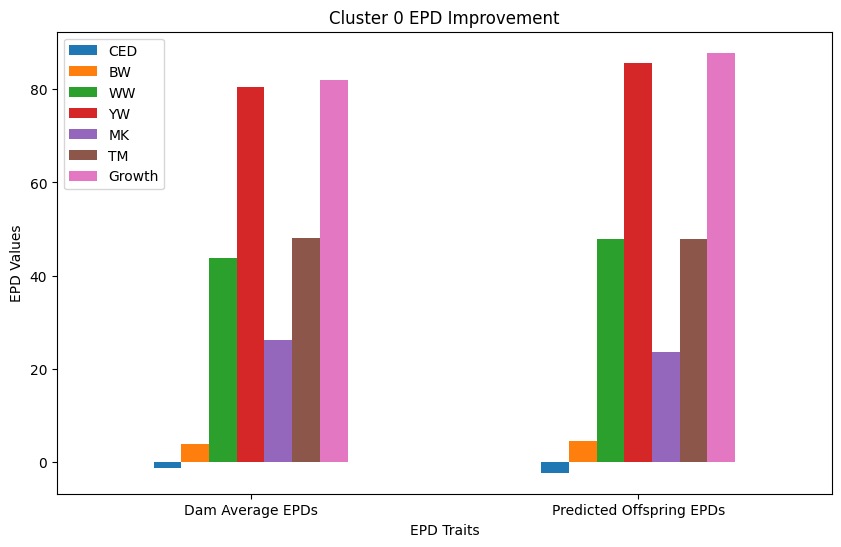


### Cluster 1 Analysis ###
Dam Cluster Average EPDs:
CED        1.861111
BW         1.816667
WW        30.944444
YW        63.388889
MK        23.777778
TM        39.274638
Growth    63.446017
dtype: float64

Identified EPD Deficiencies (compared to overall means):
BW         0.442029
WW         7.468599
YW         9.698068
TM         4.179383
Growth    10.806703
dtype: float64

Selected Sire for Cluster 1: AF251304
Sire EPDs:
CED        2.8000
BW         0.3000
WW        28.0000
YW        60.0000
MK        24.0000
TM        38.6315
Growth    60.0667
Name: 1679, dtype: float64

Sire Addresses the Following Deficiencies:
- BW: Sire improves by 1.52 units over dam cluster average.

Expected Improvement in Offspring EPDs:
- CED: Improved by 0.47 units (25.22% increase)
- BW: Improved by 0.76 units (41.74% decrease)
- WW: No improvement (change of -1.47 units, -4.76% change)
- YW: No improvement (change of -1.69 units, -2.67% change)
- MK: Improved by 0.11 units (0.47% increase)
- TM: No 

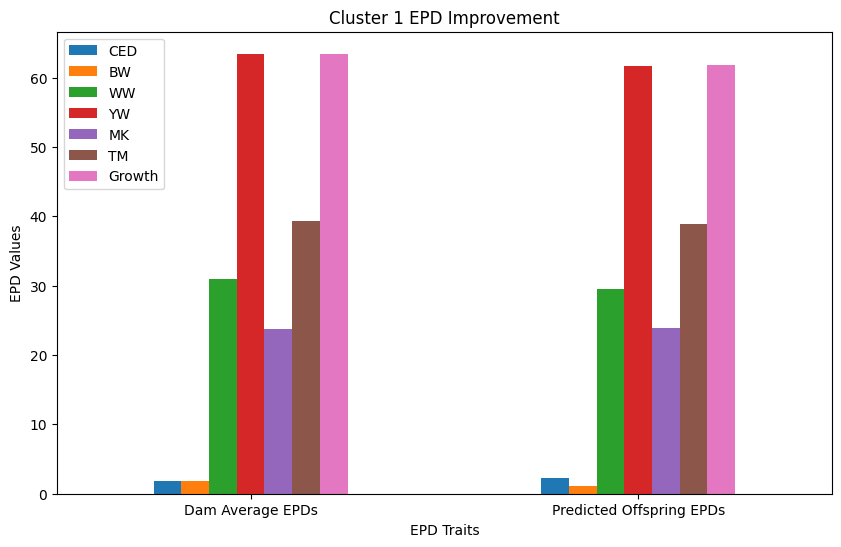


### Cluster 2 Analysis ###
Dam Cluster Average EPDs:
CED        4.425000
BW         1.631250
WW        42.750000
YW        78.500000
MK        23.125000
TM        44.638500
Growth    80.554244
dtype: float64

Identified EPD Deficiencies (compared to overall means):
BW    0.627446
dtype: float64

Selected Sire for Cluster 2: AF274862
Sire EPDs:
CED       -3.4000
BW         5.1000
WW        52.0000
YW        91.0000
MK        21.0000
TM        47.4905
Growth    93.5959
Name: 1690, dtype: float64

Sire Addresses the Following Deficiencies:
Sire does not address any deficiencies directly but was selected based on overall compatibility.

Expected Improvement in Offspring EPDs:
- CED: No improvement (change of -3.91 units, -88.42% change)
- BW: No improvement (change of 1.73 units, 106.32% change)
- WW: Improved by 4.62 units (10.82% increase)
- YW: Improved by 6.25 units (7.96% increase)
- MK: No improvement (change of -1.06 units, -4.59% change)
- TM: Improved by 1.43 units (3.19% increas

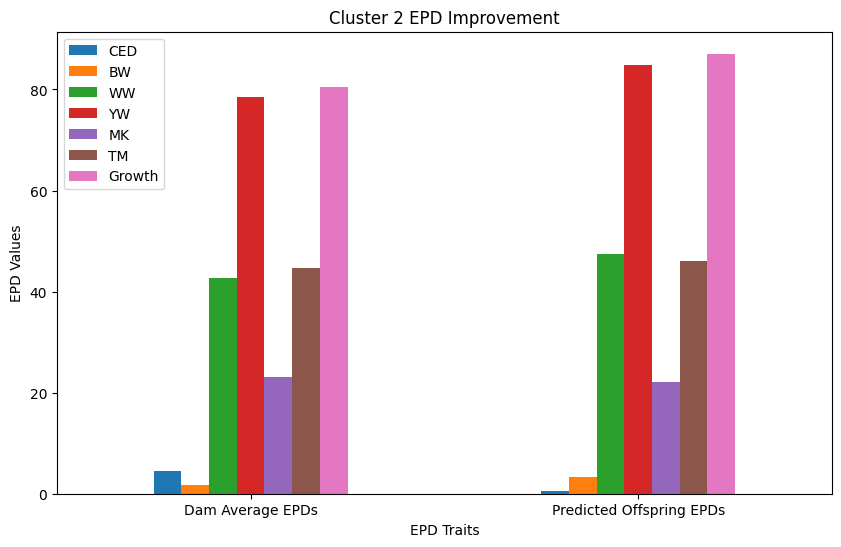

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataframe (replace with your actual dataframe)
# df = pd.read_csv('your_data.csv')  # Uncomment and adjust if needed

# Assuming df is your dataframe
# Select active sires and dams
def clusterScenario(sireDf, DamDf):
    sires_df = df[df['Designation'] == 'Bull'].copy()
    dams_df = df[df['Designation'] == 'Dam'].copy()
    print(sires_df.shape)

    # Define EPD columns
    epd_columns = ['CED', 'BW', 'WW', 'YW', 'MK', 'TM', 'Growth']

    # Ensure EPD columns are numeric
    for col in epd_columns:
        sires_df[col] = pd.to_numeric(sires_df[col], errors='coerce')
        dams_df[col] = pd.to_numeric(dams_df[col], errors='coerce')

    # Handle missing values
    sires_df = sires_df.dropna(subset=epd_columns)
    dams_df = dams_df.dropna(subset=epd_columns)

    # Select identifier columns and EPDs
    sires_df = sires_df[['Registration Number'] + epd_columns]
    sires_df.rename(columns={'Registration Number': 'Sire'}, inplace=True)

    dams_df = dams_df[['Registration Number'] + epd_columns]
    dams_df.rename(columns={'Registration Number': 'Dam'}, inplace=True)

    # Define desired traits and desired directions
    desired_traits = {
        'CED': 'high',      # Higher Calving Ease Direct is better
        'BW': 'moderate',   # Moderate Birth Weight
        'WW': 'high',       # Higher Weaning Weight
        'YW': 'high',       # Higher Yearling Weight
        'MK': 'moderate',   # Moderate Milk
        'TM': 'moderate',   # Moderate Total Maternal
        'Growth': 'high'    # Higher Growth
    }

    desired_directions = {
        'CED': 'increase',  # Higher CED is better
        'BW': 'decrease',   # Lower BW is better
        'WW': 'increase',   # Higher WW is better
        'YW': 'increase',   # Higher YW is better
        'MK': 'increase',   # Higher MK is better
        'TM': 'increase',   # Higher TM is better
        'Growth': 'increase' # Higher Growth is better
    }

    # Function to match sires to dam clusters
    def match_sires_to_dam_clusters(sires_df, dams_df, epd_columns, desired_traits, desired_directions, n_clusters=3):
        """
        Clusters dams based on their EPDs, scores sires for each cluster, and identifies the best sire for each cluster.
        """
        # Prepare dam data
        dams_epd = dams_df[['Dam'] + epd_columns].dropna(subset=epd_columns)
        dam_ids = dams_epd['Dam']
        dams_epd_data = dams_epd[epd_columns]
        
        # Standardize dam EPDs
        scaler = StandardScaler()
        dams_epd_scaled = scaler.fit_transform(dams_epd_data)
        
        # Perform clustering on dams
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(dams_epd_scaled)
        dams_epd['Cluster'] = cluster_labels
        
        # Calculate cluster means and EPD gaps
        cluster_means = dams_epd.groupby('Cluster')[epd_columns].mean()
        overall_means = dams_epd[epd_columns].mean()
        epd_gaps = cluster_means - overall_means
        
        # Prepare sire data
        sires_epd = sires_df[['Sire'] + epd_columns].dropna(subset=epd_columns)
        sire_ids = sires_epd['Sire']
        sires_epd_data = sires_epd[epd_columns]
        
        # Function to calculate sire score for a cluster
        def sire_cluster_score(sire_epds, cluster_gaps, overall_means, epd_columns, desired_traits, desired_directions):
            score = 0
            for epd in epd_columns:
                trait_pref = desired_traits.get(epd)
                desired_direction = desired_directions.get(epd)
        
                # Calculate the difference between the sire's EPD and the overall mean
                sire_diff = sire_epds[epd] - overall_means[epd]
                gap = cluster_gaps[epd]
        
                if trait_pref == 'high':
                    if desired_direction == 'increase':
                        score += sire_diff * gap
                    elif desired_direction == 'decrease':
                        score -= sire_diff * gap  # Since lower is better
                elif trait_pref == 'moderate':
                    score -= abs(sire_diff) * abs(gap)
                elif trait_pref == 'low':
                    if desired_direction == 'decrease':
                        score += (-sire_diff) * gap
                    elif desired_direction == 'increase':
                        score -= (-sire_diff) * gap
                else:
                    continue
            return score
        
        # Score sires for each cluster
        sire_scores = {}
        for index, sire in sires_epd.iterrows():
            sire_id = sire['Sire']
            sire_epds = sire[epd_columns]
            scores = []
            for cluster_num in cluster_means.index:
                cluster_gap = epd_gaps.loc[cluster_num]
                score = sire_cluster_score(
                    sire_epds=sire_epds,
                    cluster_gaps=cluster_gap,
                    overall_means=overall_means,
                    epd_columns=epd_columns,
                    desired_traits=desired_traits,
                    desired_directions=desired_directions
                )
                scores.append(score)
            sire_scores[sire_id] = scores
        
        # Create a DataFrame of sire scores
        sire_scores_df = pd.DataFrame(sire_scores, index=cluster_means.index)
        
        # Identify best sire for each cluster
        best_sires = {}
        for cluster_num in cluster_means.index:
            best_sire_id = sire_scores_df.loc[cluster_num].idxmax()
            best_sires[cluster_num] = best_sire_id
        
        # Predict offspring EPDs for each cluster
        offspring_epds = {}
        for cluster_num in cluster_means.index:
            best_sire_id = best_sires[cluster_num]
            sire_epds = sires_epd[sires_epd['Sire'] == best_sire_id][epd_columns].iloc[0]
            dam_cluster_mean_epds = cluster_means.loc[cluster_num]
            offspring_epd = (sire_epds + dam_cluster_mean_epds) / 2
            offspring_epds[cluster_num] = offspring_epd
        
        # Prepare dam_clusters DataFrame
        dam_clusters = dams_epd[['Dam', 'Cluster']]
        
        return dam_clusters, best_sires, offspring_epds, cluster_means, overall_means

    # Function to analyze dam clusters
    def analyze_dam_clusters(dams_df, dam_clusters, epd_columns):
        """
        Analyzes each dam cluster to identify EPD deficiencies.
        """
        # Merge dams with their clusters
        dams_clustered = dams_df.merge(dam_clusters, on='Dam')
        
        # Calculate overall means
        overall_means = dams_df[epd_columns].mean()
        
        cluster_analysis = {}
        
        for cluster_num in dam_clusters['Cluster'].unique():
            cluster_dams = dams_clustered[dams_clustered['Cluster'] == cluster_num]
            cluster_mean_epds = cluster_dams[epd_columns].mean()
            epd_gaps = overall_means - cluster_mean_epds  # Positive values indicate deficiencies
            
            # Identify significant deficiencies (e.g., more than 5% below the overall mean)
            deficiencies = epd_gaps[epd_gaps > (0.05 * overall_means)]
            
            cluster_analysis[cluster_num] = {
                'mean_epds': cluster_mean_epds,
                'deficiencies': deficiencies
            }
        
        return cluster_analysis

    # Function to explain sire selection
    def explain_sire_selection(cluster_analysis, best_sires, sires_df, epd_columns):
        """
        Provides explanations for why each sire was selected for a cluster.
        """
        sire_explanations = {}
        
        for cluster_num, sire_id in best_sires.items():
            sire_epds = sires_df[sires_df['Sire'] == sire_id][epd_columns].iloc[0]
            deficiencies = cluster_analysis[cluster_num]['deficiencies']
            
            # Check how sire's EPDs address deficiencies
            improvements = {}
            for epd in deficiencies.index:
                sire_value = sire_epds[epd]
                dam_cluster_mean = cluster_analysis[cluster_num]['mean_epds'][epd]
                if desired_directions[epd] == 'increase':
                    if sire_value > dam_cluster_mean:
                        improvements[epd] = sire_value - dam_cluster_mean
                elif desired_directions[epd] == 'decrease':
                    if sire_value < dam_cluster_mean:
                        improvements[epd] = dam_cluster_mean - sire_value
            
            sire_explanations[cluster_num] = {
                'sire_id': sire_id,
                'sire_epds': sire_epds,
                'improvements': improvements
            }
        
        return sire_explanations

    # Function to plot EPD improvements
    def plot_epd_improvement(cluster_num, dam_mean_epds, offspring_epds, epd_columns):
        """
        Plots the average dam EPDs and predicted offspring EPDs for a cluster.
        """
        # Ensure that the Series are aligned and ordered
        dam_epds = dam_mean_epds[epd_columns]
        offspring_epds = offspring_epds[epd_columns]
        
        # Create DataFrame for plotting
        df_plot = pd.DataFrame({
            'Dam Average EPDs': dam_epds,
            'Predicted Offspring EPDs': offspring_epds
        })
        
        # Transpose the DataFrame to have EPD traits on the x-axis
        df_plot = df_plot.T
        
        # Plotting
        df_plot.plot(kind='bar', figsize=(10, 6))
        plt.title(f'Cluster {cluster_num} EPD Improvement')
        plt.ylabel('EPD Values')
        plt.xlabel('EPD Traits')
        plt.xticks(rotation=0)
        plt.legend()
        plt.show()

    # Number of clusters
    n_clusters = 3  # Adjust based on your data

    # Call the function to match sires to dam clusters
    dam_clusters, best_sires, offspring_epds, cluster_means, overall_means = match_sires_to_dam_clusters(
        sires_df, dams_df, epd_columns, desired_traits, desired_directions, n_clusters=n_clusters
    )

    # Analyze dam clusters
    cluster_analysis = analyze_dam_clusters(dams_df, dam_clusters, epd_columns)

    # Explain sire selection
    sire_explanations = explain_sire_selection(cluster_analysis, best_sires, sires_df, epd_columns)

    # Print detailed explanations
    for cluster_num in sorted(cluster_analysis.keys()):
        print(f"\n### Cluster {cluster_num} Analysis ###")
        print("Dam Cluster Average EPDs:")
        print(cluster_analysis[cluster_num]['mean_epds'])
        print("\nIdentified EPD Deficiencies (compared to overall means):")
        if not cluster_analysis[cluster_num]['deficiencies'].empty:
            print(cluster_analysis[cluster_num]['deficiencies'])
        else:
            print("No significant deficiencies.")
        
        # Sire selection explanation
        sire_info = sire_explanations[cluster_num]
        print(f"\nSelected Sire for Cluster {cluster_num}: {sire_info['sire_id']}")
        print("Sire EPDs:")
        print(sire_info['sire_epds'])
        print("\nSire Addresses the Following Deficiencies:")
        if sire_info['improvements']:
            for epd, improvement in sire_info['improvements'].items():
                print(f"- {epd}: Sire improves by {improvement:.2f} units over dam cluster average.")
        else:
            print("Sire does not address any deficiencies directly but was selected based on overall compatibility.")
        
        # Calculate and display improvements
        dam_mean_epds = cluster_analysis[cluster_num]['mean_epds']
        offspring_epd = offspring_epds[cluster_num]
        print("\nExpected Improvement in Offspring EPDs:")
        for epd in epd_columns:
            dam_value = dam_mean_epds[epd]
            offspring_value = offspring_epd[epd]
            improvement = offspring_value - dam_value
            percentage = (improvement / abs(dam_value)) * 100 if dam_value != 0 else 0

            desired_direction = desired_directions[epd]

            # Determine if the change is in the desired direction
            if desired_direction == 'increase':
                is_improvement = improvement > 0
                change_desc = 'increase'
            elif desired_direction == 'decrease':
                is_improvement = improvement < 0
                change_desc = 'decrease'

            # Format the improvement message accordingly
            if is_improvement:
                print(f"- {epd}: Improved by {abs(improvement):.2f} units ({abs(percentage):.2f}% {change_desc})")
            else:
                print(f"- {epd}: No improvement (change of {improvement:.2f} units, {percentage:.2f}% change)")
        
        # Plot EPD improvements
        plot_epd_improvement(cluster_num, dam_mean_epds, offspring_epd, epd_columns)

clusterScenario(sireDf, df)